# Handwritten Digit Classification
Mostafa Ebrahimi


<a id='Introduction'></a>
## <span style="color:orange">Introduction</span>
In this project, we will use the famous MNIST dataset to build a handwritten digit classifier. The dataset consists of 70,000 images, each 28 x 28 pixels grayscale image of handwritten digits (0-9). The goal is to build a model that can correctly identify the digit (0-9) written in an image.


<a id='Importing-Libraries'></a>
## <span style="color:orange">Importing Libraries & declaring constants</span>

We will use these libraries:  
- matplotlib &rarr; plot images & graphs  
- numpy &rarr; matrix operations & holding data
- tensorflow &rarr; building the neural network
- colorama &rarr; coloring the output text in terminal
- sklearn.metrics &rarr; calculating precision, recall, f1-score

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import colorama
from sklearn.metrics import classification_report

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

NUM_CLASSES = 10
Epochs = 20

def print_header(text):
    print(colorama.Style.BRIGHT + colorama.Fore.GREEN + text + colorama.Style.RESET_ALL)

## <span style="color:orange">Show Images</span>
As you see, the images are 28 x 28 pixels grayscale images of handwritten digits (0-9).  
Each pixel has a value between 0 and 255.

In [20]:
print_header("Shape of Dataset")
print(x_train.shape[1:], "\n")


print_header("Show content of a image")
print("Label: ", y_train[0]) 
print("Image: ")
print(x_train[0])


Shape of Dataset
(28, 28) 

Show content of a image
Label:  5
Image: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0

Show images of each class


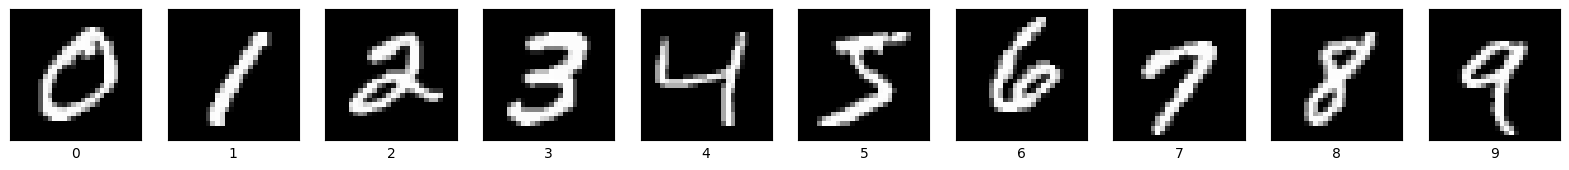

In [21]:
print_header("Show images of each class")
plt.figure(figsize=(20, 20))
for i in range(NUM_CLASSES):
    plt.subplot(1, NUM_CLASSES, i + 1)
    index_class = np.where(y_train == i)[0][0]
    img = x_train[index_class]
    plt.imshow(img, cmap='gray')
    plt.xlabel(str(i))
    plt.xticks([])
    plt.yticks([])

plt.show()

## <span style="color:orange">Count of test & train data</span>

In [22]:
print_header("Count of train data")
print(len(x_train), "\n")

print_header("Count of test data")
print(len(x_test))

Count of train data
60000 

Count of test data
10000


## <span style="color:orange">Number of images of each class</span>
We check the number of images of each class in the train set because we want to make sure that the train set is `balanced`.  
If the train set is `unbalanced`, the model will `be biased towards the class with more` images and will not be able to classify the other classes correctly.

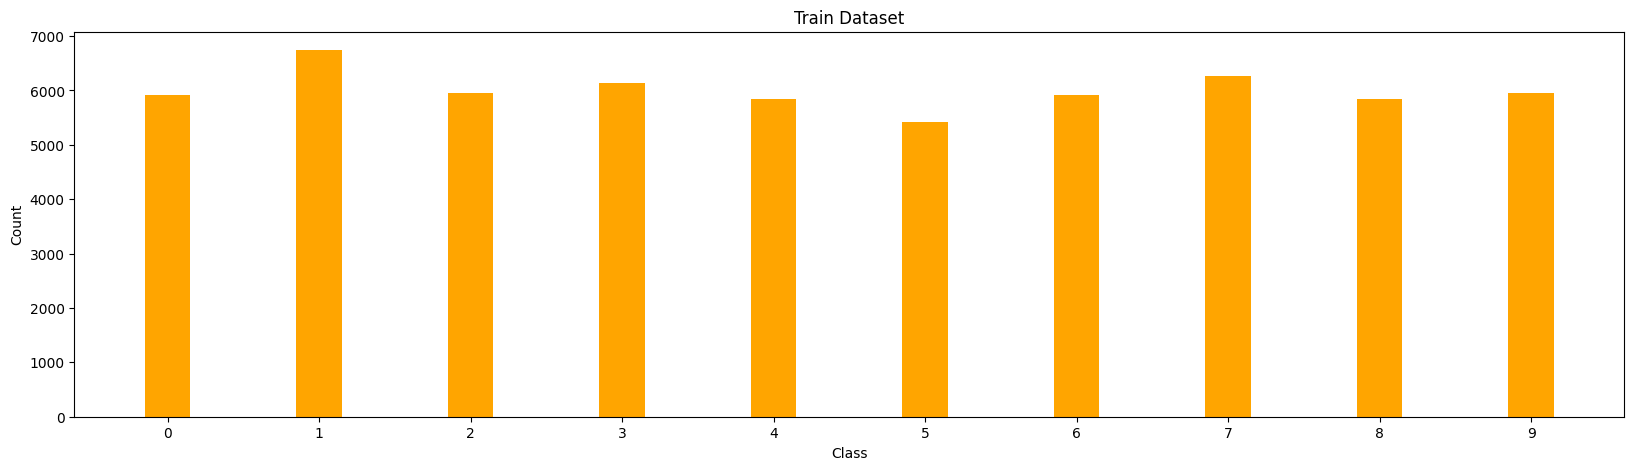

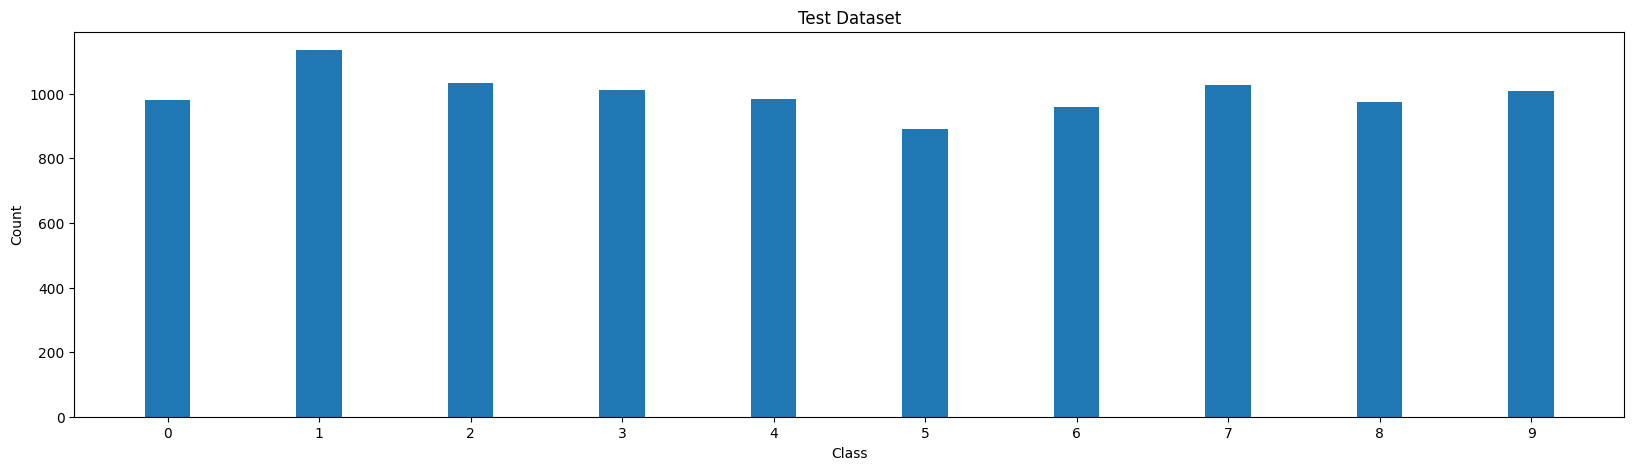

In [23]:
test_count_class = [np.sum(y_train == i) for i in range(NUM_CLASSES)]
plt.figure(figsize=(20, 5))
plt.title('Train Dataset')
plt.bar(range(NUM_CLASSES), test_count_class, width=0.3, color='orange')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(range(NUM_CLASSES))
plt.show()

test_count_class = [np.sum(y_test == i) for i in range(NUM_CLASSES)]
plt.figure(figsize=(20, 5))
plt.title('Test Dataset')
plt.bar(range(NUM_CLASSES), test_count_class, width=0.3)
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(range(NUM_CLASSES))
plt.show()

## <span style="color:orange">Normalization</span>
We often `normalize` or `standardize` the data before feeding it to the model.  
- In standardization, we subtract the mean and divide by the standard deviation.  
$$x' = \frac{x - \mu}{\sigma}$$
- In normalization, we scale the values to a range of 0 to 1.
$$x' = \frac{x - min(x)}{max(x) - min(x)}$$


`Question`: Why do we normalize or standardize the data?
- `Qual treatment of Features`: If the features have `different scales`, some features will have more impact on the model than others.
- `Speed up training`: Some algorithms train faster when the features are on a `similar scale`.
- `Enhances generalization`: It improves the neural network's ability to `handle new, unseen data effectively`.

In [24]:
min_value = np.min(x_train)
max_value = np.max(x_train)
print_header("Min & Max value of data before normalization")
print("Min: ", min_value)
print("Max: ", max_value)
print("\n")

def normalize_data(data, min_value, max_value):
    return (data - min_value) / (max_value - min_value)

x_train = normalize_data(x_train, min_value, max_value)
x_test = normalize_data(x_test, min_value, max_value)

min_value = np.min(x_train)
max_value = np.max(x_train)
print_header("Min & Max value of data after normalization")
print("Min: ", min_value)
print("Max: ", max_value)
print("\n")

print_header("Show content of a image after normalization")
print("Label: ", y_train[0])
print("Image: ")
print(x_train[0])

Min & Max value of data before normalization
Min:  0
Max:  255


Min & Max value of data after normalization
Min:  0.0
Max:  1.0


Show content of a image after normalization
Label:  5
Image: 
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.     

## <span style="color:orange">Convert labels to one-hot codes</span>
We convert the labels to one-hot codes because there is no `ordinal relationship` between the labels.

In [7]:
y_train_1_hot = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test_1_hot = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

print_header("Show a label after one-hot encoding")
print(y_train_1_hot[0])

Show a label after one-hot encoding
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## <span style="color:orange">Generate the model</span>
Batch:The number of images that we feed to the model at once. We feed the images in batches because it is not possible to store all the images in the memory at once.  

Epoch:The number of times that we feed the whole dataset to the model.

In [8]:
# Input layer : 28 x 28 = 784 n 
# 2 hidden layer : which has 16 n
# Output layer : 10 n

def get_model(x_train, y_train_1_hot, x_test, y_test_1_hot):
    # Define model
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    # Compile model
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    log = model.fit(x_train, y_train_1_hot, epochs = Epochs, batch_size = 32, validation_data=(x_test, y_test_1_hot))

    return model, log

For an input image of 28x28 pixels, the `Flatten layer` will `convert it into a 1D array` of 784 elements (28*28 = 784). So, the input layer will have 784 neurons.

In [9]:
model, log = get_model(x_train, y_train_1_hot, x_test, y_test_1_hot)

Epoch 1/20
1875/1875 [==============================] - 1s 517us/step - loss: 0.4256 - accuracy: 0.8770 - val_loss: 0.2473 - val_accuracy: 0.9288
Epoch 2/20
1875/1875 [==============================] - 1s 527us/step - loss: 0.2419 - accuracy: 0.9306 - val_loss: 0.2089 - val_accuracy: 0.9391
Epoch 3/20
1875/1875 [==============================] - 1s 466us/step - loss: 0.2084 - accuracy: 0.9399 - val_loss: 0.1997 - val_accuracy: 0.9412
Epoch 4/20
1875/1875 [==============================] - 1s 455us/step - loss: 0.1854 - accuracy: 0.9465 - val_loss: 0.1803 - val_accuracy: 0.9471
Epoch 5/20
1875/1875 [==============================] - 1s 446us/step - loss: 0.1687 - accuracy: 0.9506 - val_loss: 0.1692 - val_accuracy: 0.9495
Epoch 6/20
1875/1875 [==============================] - 1s 542us/step - loss: 0.1567 - accuracy: 0.9539 - val_loss: 0.1657 - val_accuracy: 0.9513
Epoch 7/20
1875/1875 [==============================] - 1s 521us/step - loss: 0.1487 - accuracy: 0.9571 - val_loss: 0.1725 -

## <span style="color:orange">Analyze the model</span>

In [10]:
def draw_loss_accuracy_model(log):
    plt.figure(figsize=(20, 3))
    plt.plot(log.history['loss'], label='Training Loss', color='blue')
    plt.plot(log.history['val_loss'], label='Validation Loss', color='red')
    plt.xticks(np.arange(0, Epochs, 1))
    plt.xlabel("Epochs")
    plt.legend()
    plt.show()

    plt.figure(figsize=(20, 3))
    plt.plot(log.history['accuracy'], label='Training Accuracy', color='blue')
    plt.plot(log.history['val_accuracy'], label='Validation Accuracy', color='red')
    plt.xticks(np.arange(0, Epochs, 1))
    plt.xlabel("Epochs")
    plt.legend()
    plt.show()

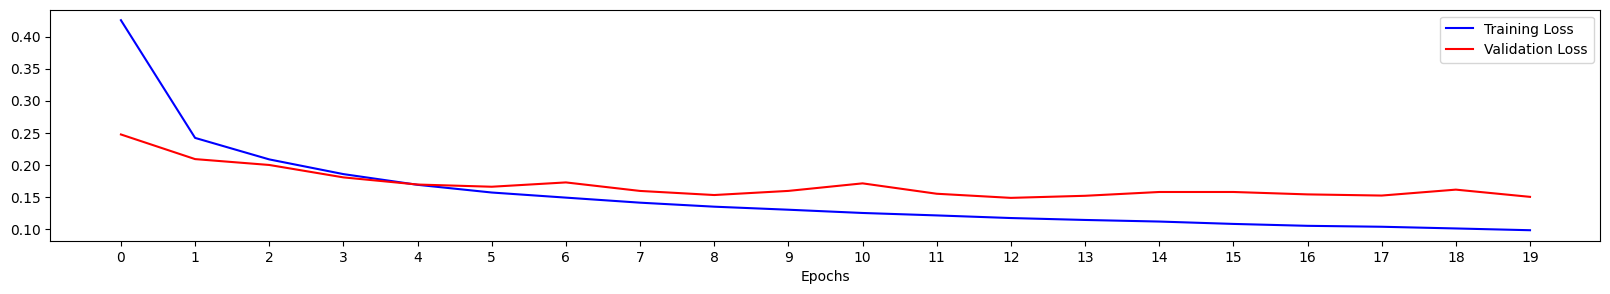

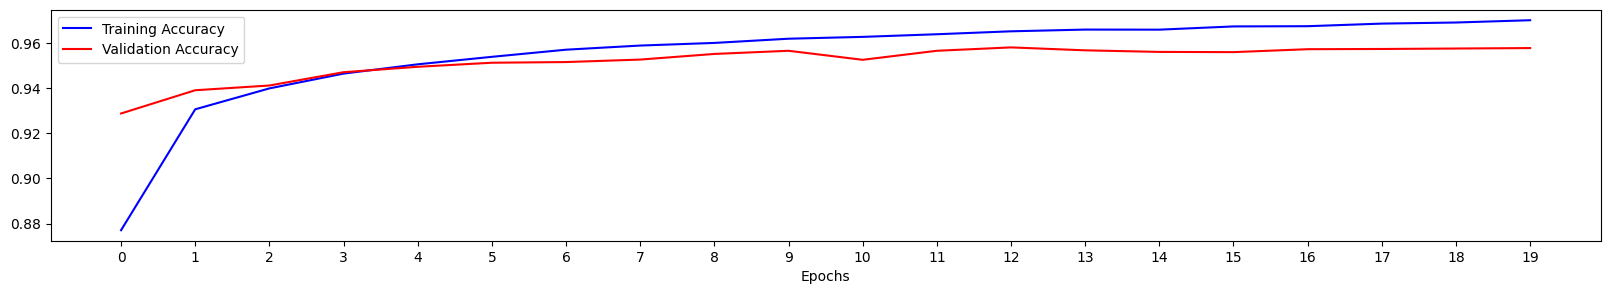

In [11]:
draw_loss_accuracy_model(log)

In [12]:
def evaluate_model_performance(model, x_data, y_data):
    y_pred = model.predict(x_data)
    y_pred_classes = np.argmax(y_pred, axis=1)

    print('\n')
    print(classification_report(y_data, y_pred_classes))
    return y_pred_classes

In [13]:
print(colorama.Style.BRIGHT + colorama.Fore.GREEN + 'Classification Report_Training Data)', colorama.Fore.RESET)
cnn_pred_class_train = evaluate_model_performance(model, x_train, y_train)

print('\n\n')

print(colorama.Style.BRIGHT + colorama.Fore.GREEN + 'Classification Report_Testing Data)', colorama.Fore.RESET)
cnn_pred_class_test = evaluate_model_performance(model, x_test, y_test)

Classification Report_Training Data) 
1875/1875 [==============================] - 1s 280us/step


              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5923
           1       0.99      0.99      0.99      6742
           2       0.97      0.98      0.98      5958
           3       0.97      0.97      0.97      6131
           4       0.97      0.98      0.97      5842
           5       0.97      0.97      0.97      5421
           6       0.98      0.99      0.98      5918
           7       0.98      0.97      0.98      6265
           8       0.97      0.96      0.96      5851
           9       0.96      0.96      0.96      5949

    accuracy                           0.98     60000
   macro avg       0.97      0.97      0.97     60000
weighted avg       0.98      0.98      0.98     60000




Classification Report_Testing Data) 
313/313 [==============================] - 0s 261us/step


              precision    recall  f1-score